## Pima Indians Diabetes Database

## Datasetlink:https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,fbeta_score



In [100]:
df=pd.read_csv('diabetes.csv')

In [101]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [102]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [103]:
df.shape

(768, 9)

In [104]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [106]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [108]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

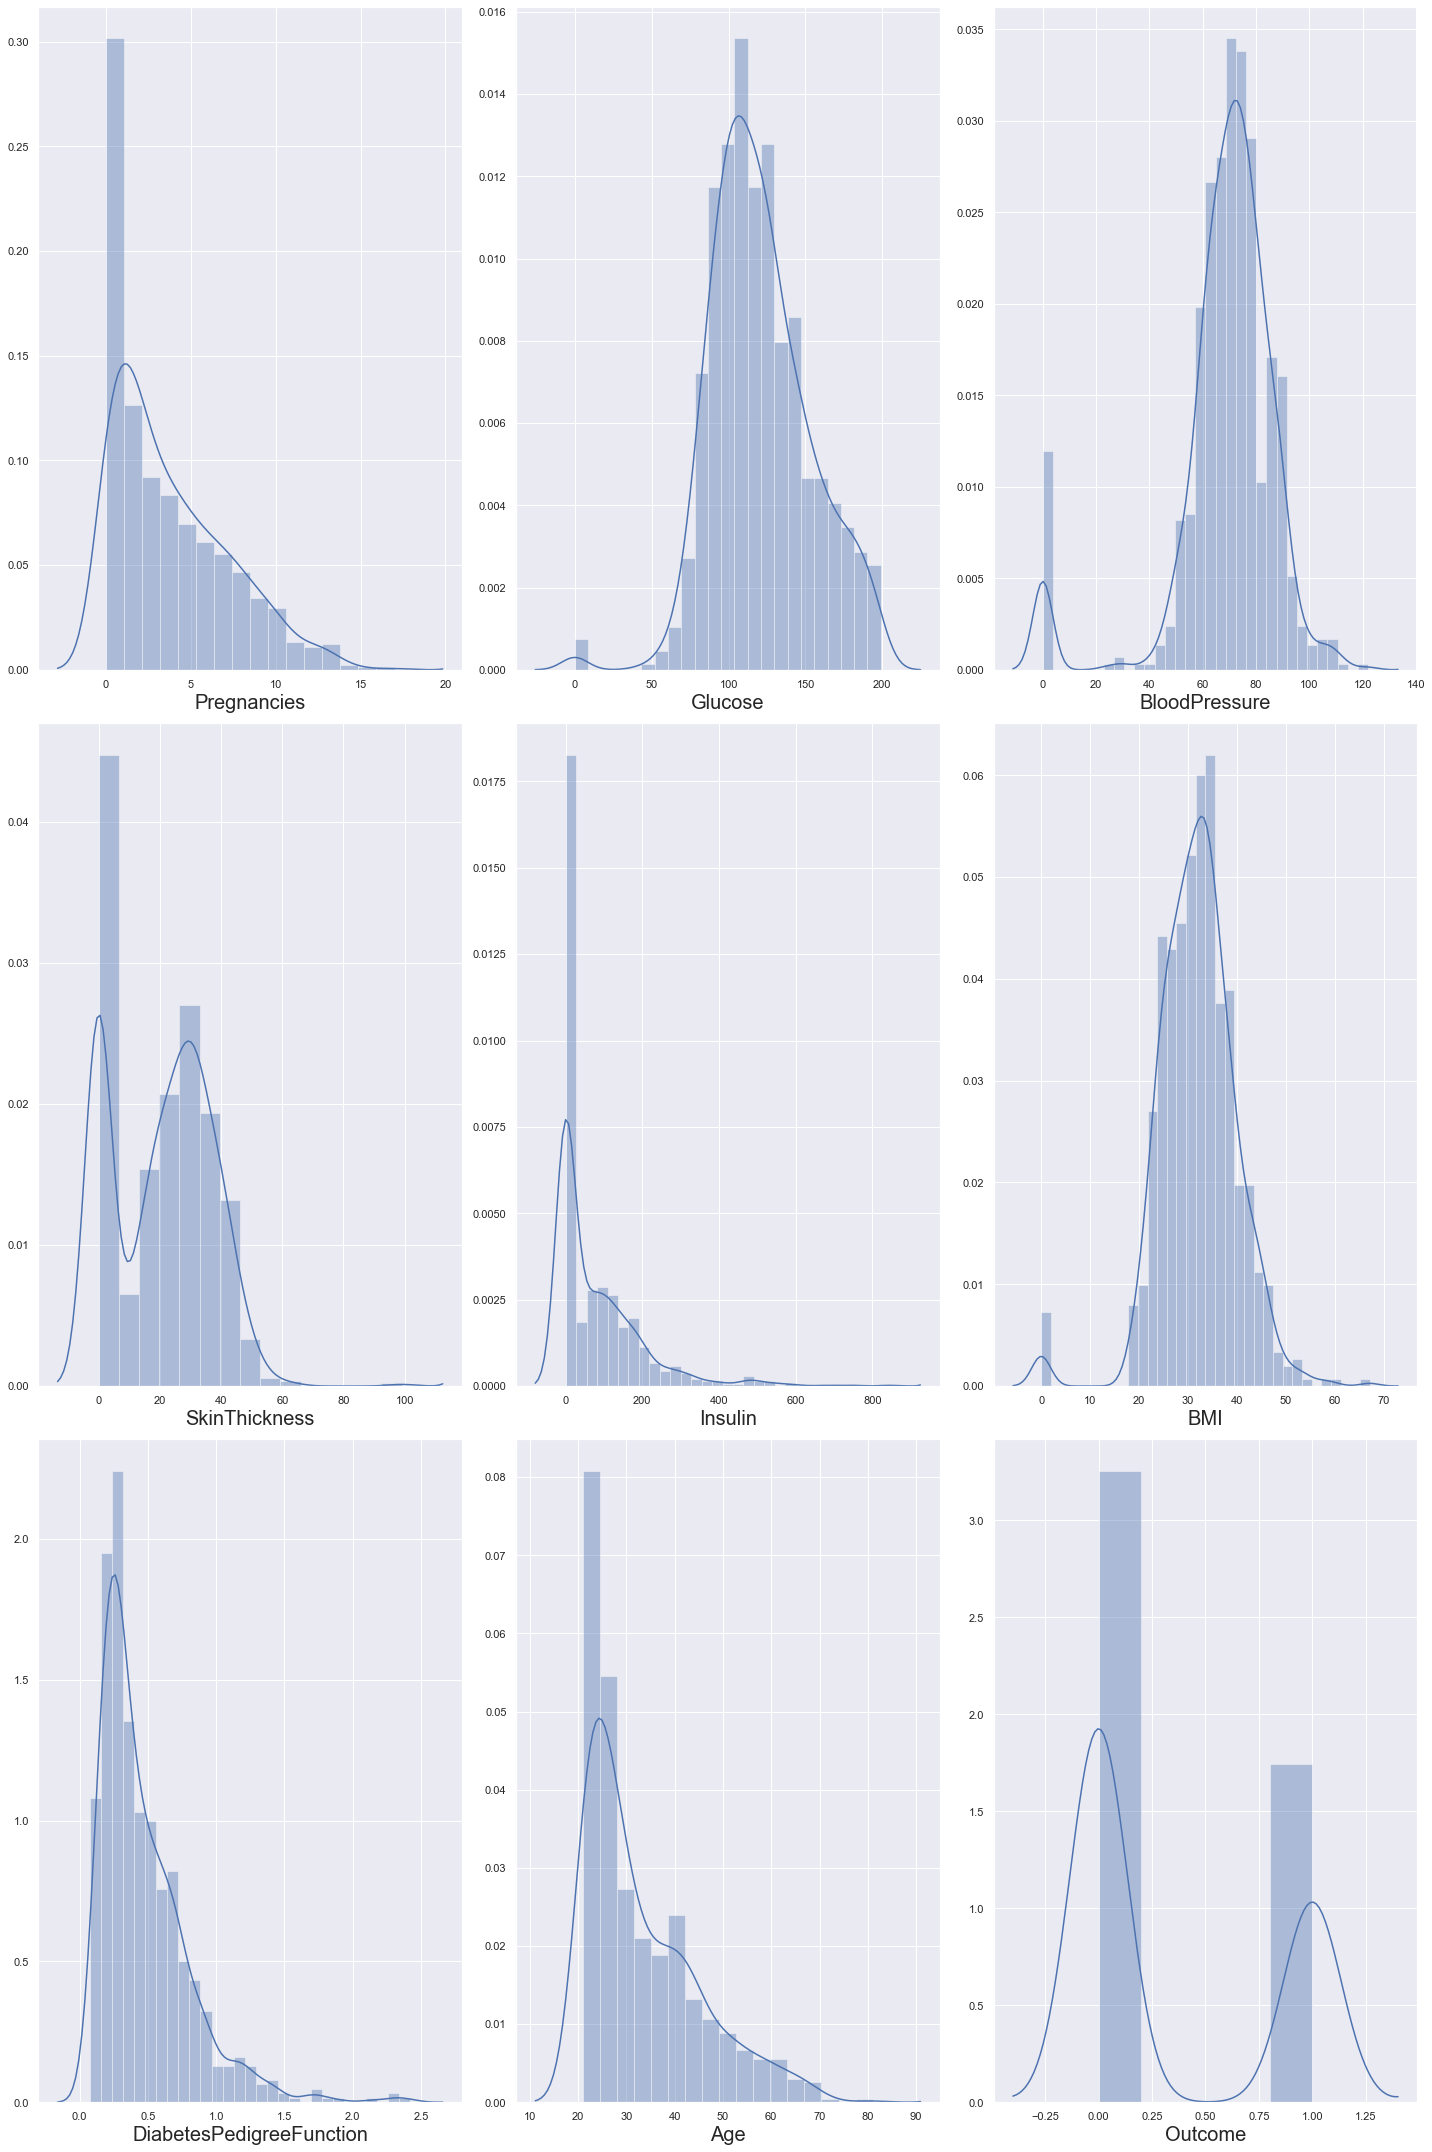

In [109]:
# lets see how data distributed for every column
plt.figure(figsize=(20,30),facecolor='White')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
#         plt.ylabel(column,fontsize=20)
        plotnumber+=1
plt.tight_layout()        


## Observation:
    1.Pregancies,Insuline has right skewed this indicates that feature has outlier toward right distribution
    2.Glucose,BloodPressure,BMI,Diabetpedegreefunction,Age has outlier Towards left side distribution
    

## Replacing zero values with mean and checking distribution

In [110]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

## lets see how data distributed for every column

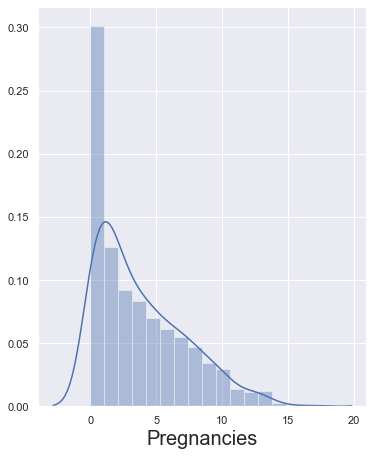

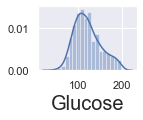

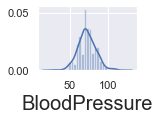

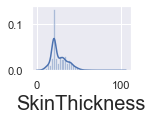

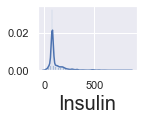

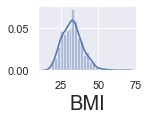

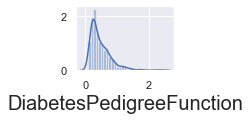

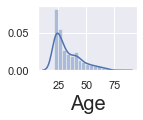

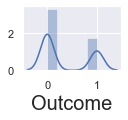

In [111]:
plt.figure(figsize=(20,25),facecolor='White')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
    plt.show()  

## Data looks better.But,there still are outliers present in some columns.let'S  deal with them

In [113]:
q= df['Pregnancies'].quantile(0.98)
# we remove top 2% data from Pregancies column
df_cleaned=df[df['Pregnancies']<q]

q=df_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
df_cleaned=df_cleaned[df_cleaned['BMI']<q]

q=df_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
df_cleaned=df_cleaned[df_cleaned['SkinThickness']<q]


q=df_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
df_cleaned=df_cleaned[df_cleaned['Insulin']<q]


q=df_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
df_cleaned=df_cleaned[df_cleaned['DiabetesPedigreeFunction']<q]


q=df_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
df_cleaned=df_cleaned[df_cleaned['Age']<q]


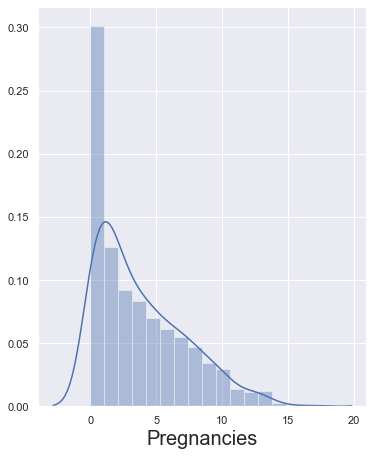

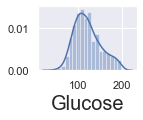

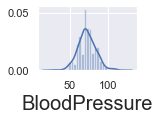

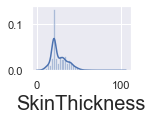

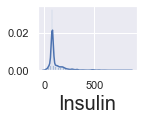

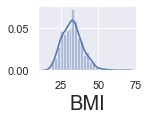

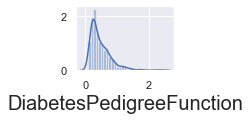

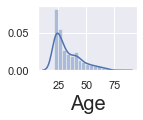

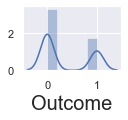

In [114]:
plt.figure(figsize=(20,25),facecolor='White')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
    plt.show()  

## The data looks much better now than before.we will start our analysis with this data nowas we dont want to loose important information.if our model doesn't work with acuracy,we will come back for more preprocessing

## Before we fit our data to amodel,lets visualize the relationship between our independent variables and the categories

In [115]:
X=df.drop(columns=['Outcome'])
y=df['Outcome']

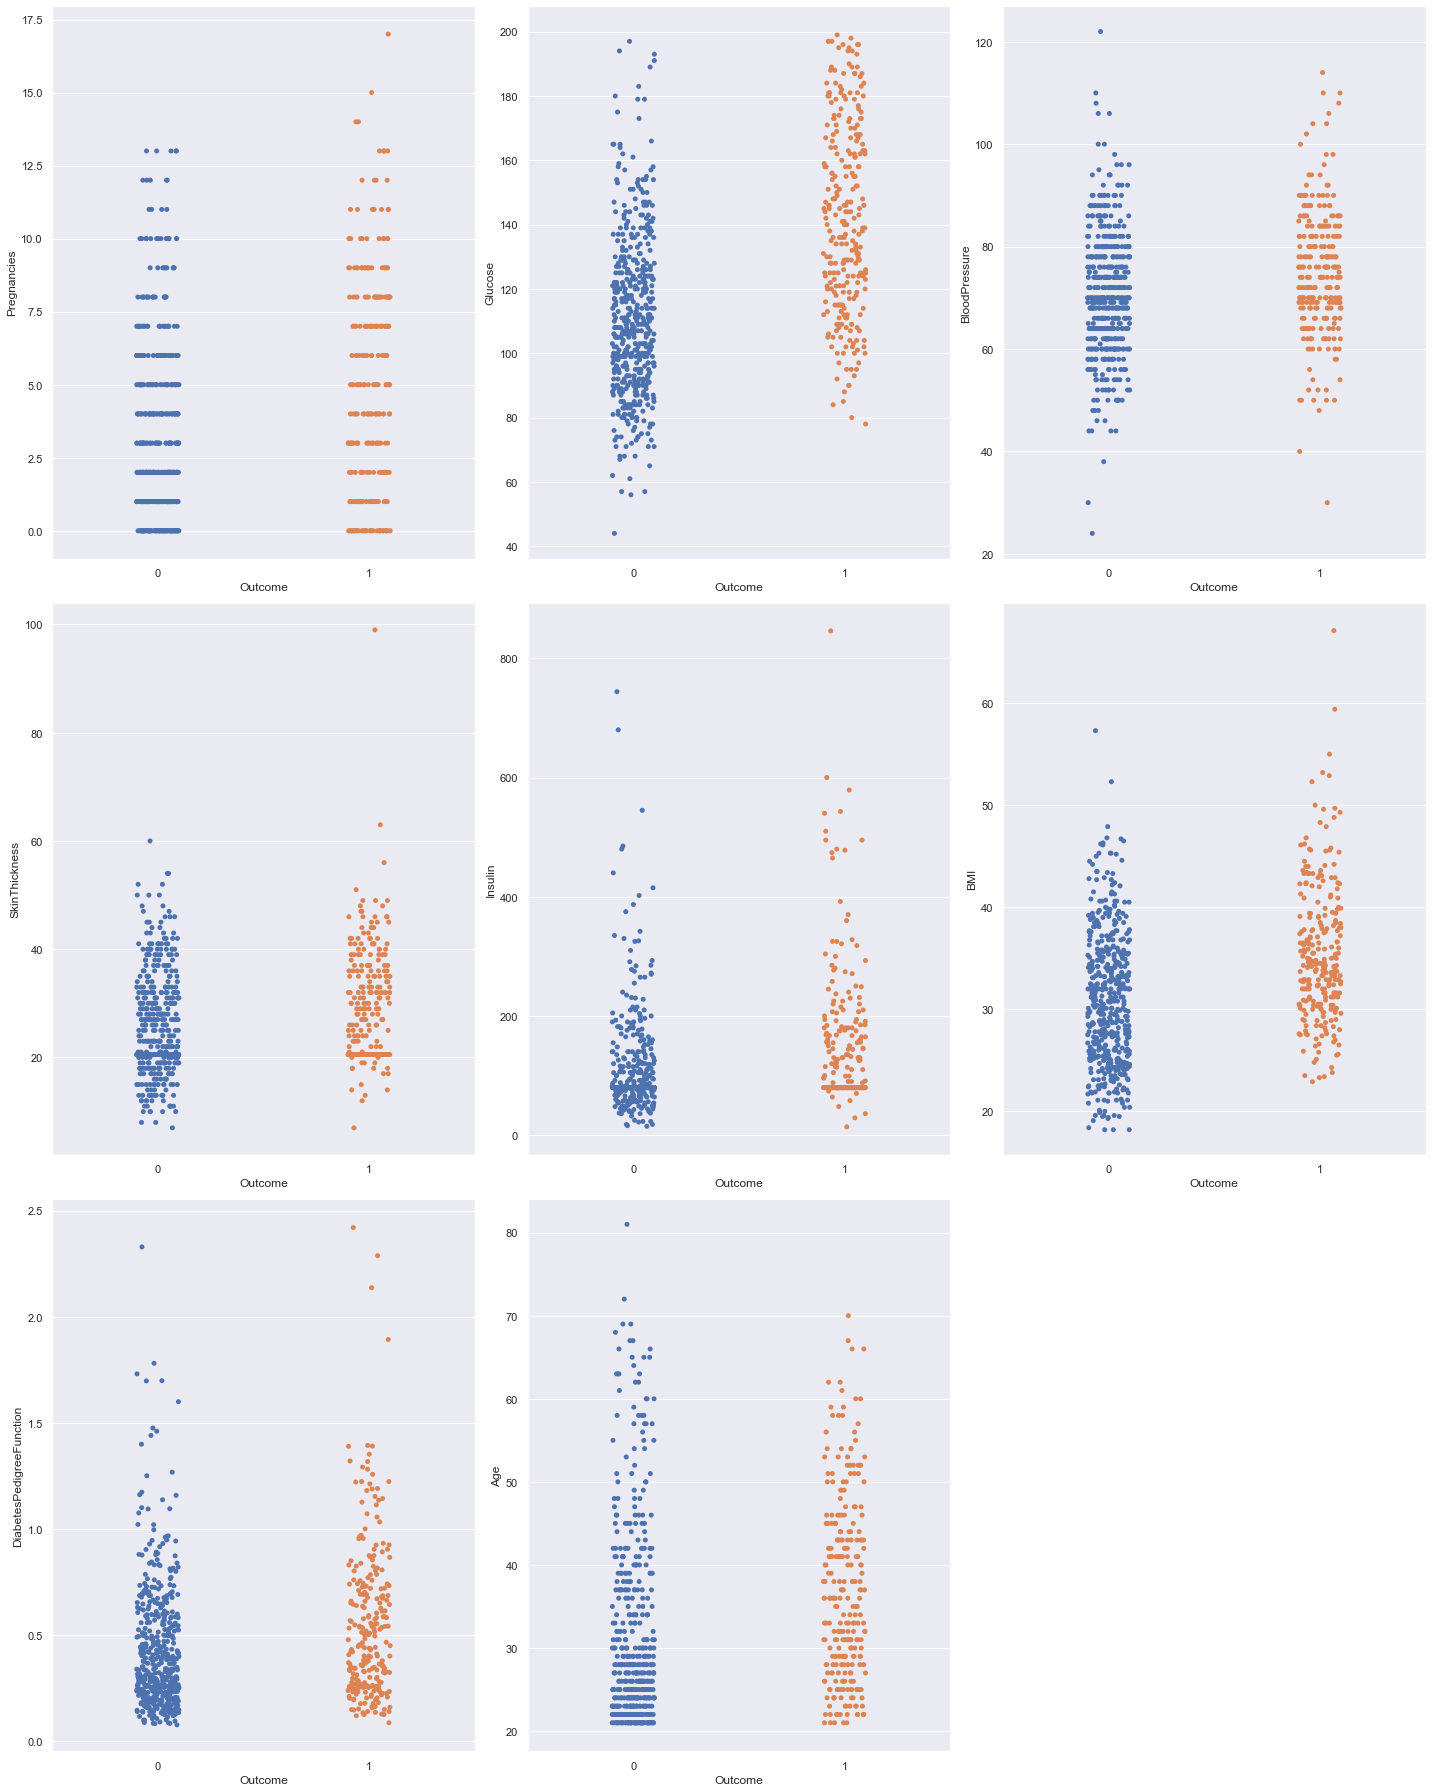

In [116]:
plt.figure(figsize=(20,25),facecolor='White')
plotnumber =1

for column in X:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
#         plt.xlabel(column,fontsize=20)
# plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()    

## Model Training

In [117]:
scaler=StandardScaler()


In [118]:
X_scaled=scaler.fit_transform(X)

In [119]:
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=355)

In [121]:
log_reg=LogisticRegression()

log_reg.fit(X_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
log_reg.score(X_train,y_train)

0.7704280155642024

## lets see how weel our model perform on the test data set

In [123]:
y_pred=log_reg.predict(X_test)

In [124]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

## Performance matrix

# 1.Confusion matrix

In [125]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[146,  22],
       [ 42,  44]], dtype=int64)

In [126]:
true_positive =conf_matrix[0][0]
false_positive =conf_matrix[0][1]
false_negative =conf_matrix[1][0]
true_negative =conf_matrix[0][0]

In [127]:
true_positive 
false_positive 
false_negative 
true_negative 

146

## 2.Accuracy

In [128]:
Accuracy=(true_positive+true_negative)/(true_positive +false_positive+false_negative+true_negative)
Accuracy

0.8202247191011236

## 3.Precision

In [129]:
precision=true_positive/(true_positive+false_positive)
precision

0.8690476190476191

## 4.Recall

In [130]:
Recall=true_positive/(true_positive+false_negative)
Recall

0.776595744680851

## 5.F-beta score

In [131]:
F1_score = 2*(Recall * precision)/(Recall +precision)
F1_score

0.8202247191011236